### How to Extract Labelled Topics from Natural Language **Data**

What is topic modeling?
Topic modeling is a method for unsupervised classification of documents, similar to clustering on numeric data, which finds some natural groups of items (topics) even when we’re not sure what we’re looking for.
Topic modeling provides methods for automatically organizing, understanding, searching, and summarizing large electronic archives.
It can help with the following:
* discovering the hidden themes in the collection.
* classifying the documents into the discovered themes.
* using the classification to organize/summarize/search the documents.




In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import matplotlib.pyplot as plt
import seaborn as sns
!pip install tweet-preprocessor
import preprocessor as p

In [ ]:
#Data is a collection of tweets about customer support issues on Twitter,

In [ ]:

#woeking with the text column only
df = pd.read_csv("sample.csv",usecols=['text'])

In [ ]:
df

,text
0,@AppleSupport causing the reply to be disregar...
1,@105835 Your business means a lot to us. Pleas...
2,@76328 I really hope you all change but I'm su...
3,@105836 LiveChat is online at the moment - htt...
4,@VirginTrains see attached error message. I've...
...,...
88,@105860 I wish Amazon had an option of where I...
89,They reschedule my shit for tomorrow https://t...
90,"@105861 Hey Sara, sorry to hear of the issues ..."
91,@Tesco bit of both - finding the layout cumber...


In [ ]:
#check for missing data
df.isnull().mean()
#isnull:Mask all values that are NaN as True
##Mask all values that are NaN as True

#No missing Data

text    0.0
dtype: float64

In [ ]:
#Cleaning:
# Create function to clean text while preserving hashtag text
def clean_text(text):
  text_without_hashtags = text.replace("#","")
  cleaned_text = p.clean(text_without_hashtags).lower().strip()
  return cleaned_text

In [ ]:
df['cleaned_text'] =df.text.apply(clean_text)

In [ ]:
df.head()

,text,cleaned_text
0,@AppleSupport causing the reply to be disregar...,causing the reply to be disregarded and the ta...
1,@105835 Your business means a lot to us. Pleas...,your business means a lot to us. please dm you...
2,@76328 I really hope you all change but I'm su...,i really hope you all change but i'm sure you ...
3,@105836 LiveChat is online at the moment - htt...,livechat is online at the moment - or contact ...
4,@VirginTrains see attached error message. I've...,see attached error message. i've tried leaving...


In [ ]:
#Vectorize the Text
#Feature Extraction
#Convert a collection of text documents to a sparse matrix of token counts
vectorized = CountVectorizer(max_features=1000,ngram_range=(2,3),stop_words='english')


In [ ]:
##Generating a matrix of token counts
vectorized_output = vectorized.fit_transform(df["cleaned_text"])

In [ ]:
vectorized

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=1000, min_df=1,
                ngram_range=(2, 3), preprocessor=None, stop_words='english',
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [ ]:
vectorized_output


<93x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 1071 stored elements in Compressed Sparse Row format>

In [ ]:
vectorized.vocabulary_

{'causing reply': 165,
 'reply disregarded': 629,
 'disregarded tapped': 274,
 'tapped notification': 798,
 'notification keyboard': 494,
 'causing reply disregarded': 166,
 'reply disregarded tapped': 630,
 'disregarded tapped notification': 275,
 'tapped notification keyboard': 799,
 'notification keyboard opened': 495,
 'business means': 139,
 'means lot': 442,
 'lot dm': 421,
 'dm zip': 300,
 'code additional': 183,
 'additional details': 15,
 'details concern': 248,
 'concern rr': 201,
 'business means lot': 140,
 'means lot dm': 443,
 'lot dm zip': 422,
 'dm zip code': 301,
 'code additional details': 184,
 'additional details concern': 16,
 'details concern rr': 249,
 'really hope': 610,
 'change sure': 169,
 'sure won': 782,
 'won don': 979,
 'really hope change': 611,
 'change sure won': 170,
 'sure won don': 783,
 'livechat online': 382,
 'online moment': 513,
 'moment contact': 470,
 'contact option': 206,
 'option leave': 523,
 'message request': 444,
 'livechat online mome

In [ ]:
vectorized_output.shape

(93, 1000)

# Create Latent Dirichlet Allocation model
**The aim of LDA is to find topics a document belongs to,based on the words in it**
# Assumptions:
* the order of the words and the grammatical role of the words (subject, object, verbs, …) are not considered in the model.
* we can eliminate words that occur in at least %80 ~ %90 of the documents, without losing any information.
* We know beforehand how many topics we want. ‘k’ is pre-decided.
* All topic assignments except for the current word in question are correct,

**How does LDA work?**

* The words that belong to a document, that we already know.
* The words that belong to a topic or the probability of words belonging into a topic, that we need to calculate.

In [ ]:
lda = LatentDirichletAllocation(n_components = 3, max_iter = 20, learning_method='online', random_state=42)

In [ ]:
lda #groups words — or in our case pairs of words- into topics,
#based on the probability that they are members of those topics.

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='online', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=20,
                          mean_change_tol=0.001, n_components=3, n_jobs=None,
                          perp_tol=0.1, random_state=42, topic_word_prior=None,
                          total_samples=1000000.0, verbose=0)

In [ ]:
model= lda.fit(vectorized_output)
model.components_ #topic-term matrix


array([[0.38879929, 0.38293888, 1.30933442, ..., 0.3849763 , 1.30283365,
        1.30998423],
       [0.38366995, 0.38033923, 0.36072217, ..., 1.31007675, 0.38029648,
        0.39605164],
       [1.29062543, 1.30343787, 0.38115014, ..., 0.38543612, 0.37363169,
        0.37610088]])

In [ ]:
feature_names

['03am battery',
 '03am battery remaining',
 '2016 model',
 '2016 model sm',
 '20am 03am',
 '20am 03am battery',
 '30 hopefully',
 '30 hopefully depart',
 '72 hours',
 '72 hours yall',
 'account ass',
 'account information',
 'account information look',
 'account prior',
 'account prior deleting',
 'additional details',
 'additional details concern',
 'address account',
 'address account ass',
 'address email',
 'address email happy',
 'address email including',
 'adnams broadside',
 'adnams broadside blind',
 'affect playback',
 'affect playback does',
 'age paige',
 'age protect',
 'age protect making',
 'ages load',
 'ages load wtf',
 'ago ve',
 'ago ve getting',
 'agoura thanks',
 'agoura thanks tweeting',
 'air early',
 'air early running',
 'aircraft depart',
 'aircraft depart today',
 'alcohol looks',
 'alcohol looks challenged',
 'allow packages',
 'allow packages delivered',
 'amazon option',
 'amazon option just',
 'amp bluetooth',
 'amp bluetooth speaker',
 'amp click',
 'am

In [ ]:
#Interpret Model Results
#Create a general utility function to flatten a list.
#This helps with getting the data out from the LDA model object.
def flatten(input_list):
  flat_list = [item for sublist in input_list for item in sublist]
  return flat_list

In [ ]:
#A write_data function that gets clear and readable data
#out of the CountVecotrizer I used earlier to convert the large body
#of text into interest and out of the LDA model.
#I also wrote this information to file.
def write_data(model, feature_names, n_top_words, title):
    """
    Writes data to file for plotting in other libraries/sites such as raw graphs.
    :param model: lda model generated from scikit learn.
    :param feature_names: list of strings, contains vecotrizer features.
    :param n_top_words: int, number of words to show per topic.
    :param title: string, title of the data you write to file.
    """

    # Get feature weights per topic
    all_features_weights_topics = {}
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]
        all_features_weights_topics[topic_idx + 1] = ((top_features),(weights))

    # Reshape to write to file
    constructor_dict = {}
    constructor_dict['word'] = flatten([
        all_features_weights_topics[x][0]
        for x in all_features_weights_topics.keys()
    ])
    constructor_dict['frequency'] = flatten([
        all_features_weights_topics[x][1]
        for x in all_features_weights_topics.keys()
    ])
    constructor_dict['topic_no'] = [
        x for x in all_features_weights_topics.keys()
    ] * n_top_words

    # Write dataframe to file
    pd.DataFrame(constructor_dict).to_csv('{}.csv'.format(title, index=False))

In [ ]:
write_data(lda, feature_names, 5,'medium')

In [ ]:
medium = pd.read_csv('medium.csv')[['word', 'frequency', 'topic_no']]

In [ ]:
medium

,word,frequency,topic_no
0,send dm,5.042938,1
1,help send dm,4.109044,2
2,help send,4.097222,3
3,happy help,4.094097,1
4,happy help send,4.084609,2
5,ve tried,2.258497,3
6,new update,2.256414,1
7,let know,2.253858,2
8,looks challenged id,1.331857,3
9,telling delivery slots,1.326711,1


In [ ]:
grouped = medium.groupby('topic_no').agg(lambda x: ' '.join(set(x)))
for x, y in zip(grouped.index, grouped.values):
    print(x, y)

1 ['dm address email telling delivery slots happy help send dm new update']
2 ['happy help send help send dm sorry hear dm address let know']
3 ['help send ve tried cache cookies version ios looks challenged id']


In [ ]:

# Need to tweak the above lots to get topics out of the data

topics_dict = {
    1: 'Halloween Issues',
    2: 'Successul Customer Support',
    3: 'Goods Not Received'
}

In [ ]:
medium["named_topics"] = medium.topic_no.map(topics_dict)

In [ ]:

medium[['named_topics', 'frequency', 'word']]

,named_topics,frequency,word
0,Halloween Issues,5.042938,send dm
1,Successul Customer Support,4.109044,help send dm
2,Goods Not Received,4.097222,help send
3,Halloween Issues,4.094097,happy help
4,Successul Customer Support,4.084609,happy help send
5,Goods Not Received,2.258497,ve tried
6,Halloween Issues,2.256414,new update
7,Successul Customer Support,2.253858,let know
8,Goods Not Received,1.331857,looks challenged id
9,Halloween Issues,1.326711,telling delivery slots


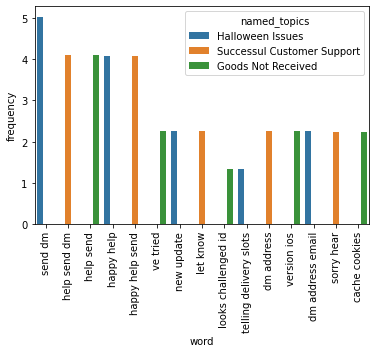

In [ ]:
sns.barplot(x='word', y='frequency', hue='named_topics', data=medium)
plt.xticks(rotation=90);